In [ ]:
import os
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img,img_to_array

Apple = '/content/drive/MyDrive/DOCUMENTS/data_fruit/Training/Apple'
Avocado = '/content/drive/MyDrive/DOCUMENTS/data_fruit/Training/Avocado'
Banana = '/content/drive/MyDrive/DOCUMENTS/data_fruit/Training/Banana'
Cherry = '/content/drive/MyDrive/DOCUMENTS/data_fruit/Training/Cherry'
GrapePink = '/content/drive/MyDrive/DOCUMENTS/data_fruit/Training/Grape_Pink'
Litchi = '/content/drive/MyDrive/DOCUMENTS/data_fruit/Training/Litchi'
Orange = '/content/drive/MyDrive/DOCUMENTS/data_fruit/Training/Orange'
Peach = '/content/drive/MyDrive/DOCUMENTS/data_fruit/Training/Peach'
Pineapple = '/content/drive/MyDrive/DOCUMENTS/data_fruit/Training/Pineapple'
Strawberry = '/content/drive/MyDrive/DOCUMENTS/data_fruit/Training/Strawberry'

folders = [Apple, Avocado, Banana, Cherry, GrapePink, Litchi, Orange, Peach, Pineapple, Strawberry]
photos, labels = list(), list()
for i in range(10):
  for file in listdir(folders[i]):
    photo = load_img(folders[i]+'/'+file, target_size=(100,100))
    photo = img_to_array(photo)
    photos.append(photo)              
    labels.append(i) 
    
photos = asarray(photos)            #lưu dữ liệu ảnh dưới dạng mảng
labels = asarray(labels)            #lưu dữ liệu phân loại dưới dạng mảng
class_name = ['Apple', 'Avocado', 'Banana', 'Cherry', 'GrapePink', 'Litchi', 'Orange', 'Peach', 'Pineapple', 'Strawberry']           

print(photos.shape, labels.shape, class_name)
save('/content/drive/MyDrive/DOCUMENTS/data_fruit/FILE_NPY/Fruits_CNN_photos.npy',photos)
save('/content/drive/MyDrive/DOCUMENTS/data_fruit/FILE_NPY/Fruit_CNN_labels.npy',labels)

(5082, 100, 100, 3) (5082,) ['Apple', 'Avocado', 'Banana', 'Cherry', 'GrapePink', 'Litchi', 'Orange', 'Peach', 'Pineapple', 'Strawberry']


In [ ]:
photos[0].shape

(100, 100, 3)

In [ ]:
#import thu vien
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Activation,BatchNormalization, Dropout, LSTM, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.utils import np_utils
from sklearn.preprocessing import scale

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.25, random_state=0)   #tạo dữ liệu train 75% và test 25%
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(3811, 100, 100, 3) (1271, 100, 100, 3)
(3811,) (1271,)


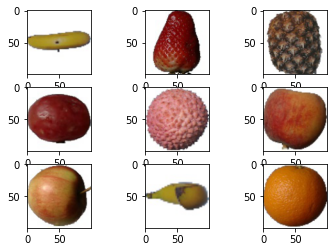

In [ ]:
#show 9 ảnh đầu tiên trong tập dữ liệu train       
x_train_show = x_train.astype(int)            
import matplotlib.pyplot as plt
from matplotlib.image import imread
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train_show[i])
plt.show()

In [ ]:
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [ ]:
#tạo model
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))  
model.add(Dense(10, activation='Softmax'))

In [ ]:
#train model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',  metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=128,epochs=20,verbose=1,validation_data = (x_test, y_test))
model.save('/content/drive/MyDrive/DOCUMENTS/MODEL_STORES/model_fruits_CNN.h5')

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


30/30 [==============================] - 6s 136ms/step - loss: 1.8700 - accuracy: 0.3826 - val_loss: 0.4845 - val_accuracy: 0.8143
Epoch 2/20
30/30 [==============================] - 3s 97ms/step - loss: 2.2798 - accuracy: 0.4025 - val_loss: 1.6972 - val_accuracy: 0.4422
Epoch 3/20
30/30 [==============================] - 3s 98ms/step - loss: 1.1664 - accuracy: 0.6623 - val_loss: 1.3003 - val_accuracy: 0.6546
Epoch 4/20
30/30 [==============================] - 3s 97ms/step - loss: 0.4248 - accuracy: 0.8856 - val_loss: 0.0566 - val_accuracy: 0.9882
Epoch 5/20
30/30 [==============================] - 3s 97ms/step - loss: 0.0338 - accuracy: 0.9940 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 6/20
30/30 [==============================] - 3s 97ms/step - loss: 0.0066 - accuracy: 0.9997 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 7/20
30/30 [==============================] - 3s 108ms/step - loss: 0.0042 - accuracy: 0.9997 - val_loss: 0.0052 - val_accuracy: 0.9992
Epoch 8/20
30/30 [====

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ',score[0])
print('test accuracy: ', score[1])

y_pred = model.predict(x_test)
print(y_pred.flatten())
print(y_test)

Test loss:  4.109161454834975e-05
test accuracy:  1.0
[1.2753315e-15 1.0000000e+00 9.3134593e-15 ... 1.7398828e-05 3.2392250e-18
 5.9282925e-15]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


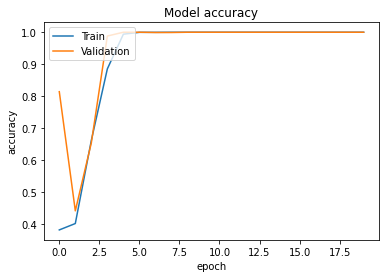

In [ ]:
#ve do thi do chinh xac
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')

[[9.9993420e-01 4.1877488e-09 4.6084348e-15 5.4619798e-09 2.7535032e-05
  1.4897457e-13 3.8190814e-05 1.1278992e-07 1.6660329e-12 2.3138032e-12]]
This is Apple


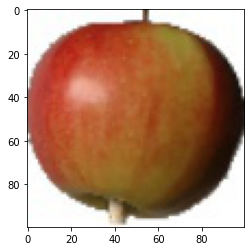

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from google.colab.patches import cv2_imshow

#load ảnh
img = load_img('Apple Red.jpg', target_size=(100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img/=255.0

#dự đoán
a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('This is',class_name[int(a)])

[[4.34623736e-23 5.38125077e-18 1.00000000e+00 1.36476437e-15
  2.74626892e-21 1.16064822e-16 4.74656857e-24 9.84290150e-23
  1.10739605e-10 1.47784782e-15]]
This is Banana


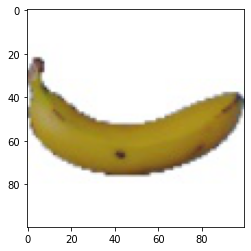

In [ ]:
#load ảnh
img = load_img('Banana.jpg', target_size=(100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img/=255.0

#dự đoán
a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('This is',class_name[int(a)])

[[1.8635954e-16 1.7389234e-14 8.5547827e-09 1.1867955e-06 8.1821916e-08
  9.9997628e-01 3.8829933e-12 1.7705445e-06 2.0654654e-05 5.9974052e-09]]
This is Litchi


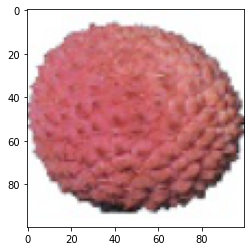

In [ ]:
#load ảnh
img = load_img('Litchi.jpg', target_size=(100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img/=255.0

#dự đoán
a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('This is',class_name[int(a)])

[[8.8676170e-04 8.4497243e-10 5.2971351e-12 1.8520109e-09 4.5421597e-04
  7.0354222e-10 9.9851030e-01 1.4864087e-04 1.2416352e-12 4.8471966e-11]]
This is Orange


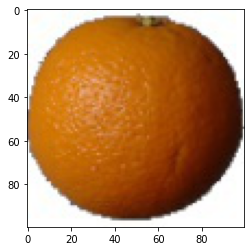

In [ ]:
#load ảnh
img = load_img('Orange.jpg', target_size=(100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img/=255.0

#dự đoán
a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('This is',class_name[int(a)])